In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [42]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
sns.set_style('darkgrid')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Masa corporal')

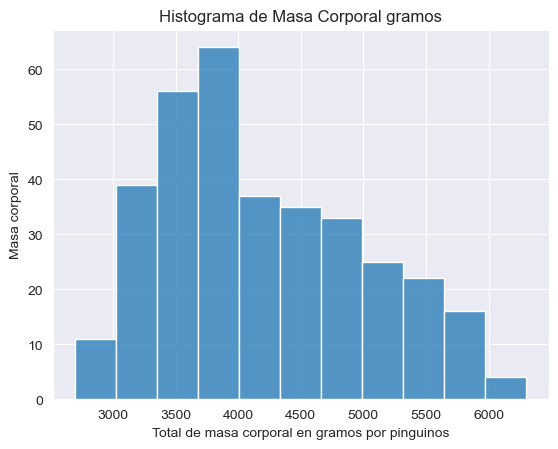

In [44]:
g = sns.histplot(data= penguins, x = 'body_mass_g')
# add label
g.set_title('Histograma de Masa Corporal gramos')
g.set_xlabel('Total de masa corporal en gramos por pinguinos')
g.set_ylabel('Masa corporal')

Text(0.5, 0, 'Masa corporal de los pinguinos')

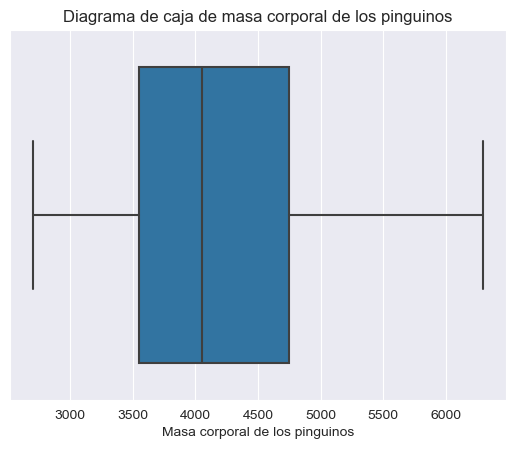

In [45]:
# diagrama de caja
t = sns.boxplot(data= penguins, x= 'body_mass_g')

# Agregar titulo y cambiar el label x
t.set_title('Diagrama de caja de masa corporal de los pinguinos')
t.set_xlabel('Masa corporal de los pinguinos')

In [46]:
# Z-escore
from scipy.stats import zscore
# calculate z-core for eaaach data point and commpute its absolute value
z_scores = zscore(penguins['body_mass_g'])
abs_z_scores = np.abs(z_scores)

# Select the ouliers using a threshold of 3
outliers = penguins[abs_z_scores > 3 ]
outliers.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [47]:
print(f'Numero de outliers: {len(outliers)}')

Numero de outliers: 0


In [48]:
# import the median_abs_deviation function
from scipy.stats import median_abs_deviation
# calculate median absolute deviation
mad = median_abs_deviation(penguins['body_mass_g'])
mad

nan

In [49]:
# import MAD estimator
from pyod.models.mad import MAD
# set thresholds to 3.5
mad = MAD(threshold=3.5)
# convert the 'body_mass_g' column into 2d numpy array
total_reshaped = penguins['body_mass_g'].values.reshape(-1, 1)
#generate inline and outliers labels
labels = mad.fit(total_reshaped).labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
seven_fifth = penguins['body_mass_g'].quantile(0.75)
twenty_fifth = penguins['body_mass_g'].quantile(0.25)
# obtain the iqr 
iqr = seven_fifth - twenty_fifth

# upper and lower thresholds
upper_limit = seven_fifth + (1.5 * iqr)
lower_limit = twenty_fifth - (1.5 * iqr)

# subset the dataset
outliers = penguins[(penguins['body_mass_g'] > lower_limit) & (penguins['body_mass_g'] < upper_limit)]
outliers.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [51]:
outliers = penguins[labels == 1]
outliers.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [52]:
#Rango intercuartilico (IQR)
seven_fifth = penguins['body_mass_g'].quantile(0.75)
twenty_fifth = penguins['body_mass_g'].quantile(0.25)
# obtain the iqr 
iqr = seven_fifth - twenty_fifth

# upper and lower thresholds
upper_limit = seven_fifth + (1.5 * iqr)
lower_limit = twenty_fifth - (1.5 * iqr)

# subset the dataset
outliers = penguins[(penguins['body_mass_g'] > lower_limit) & (penguins['body_mass_g'] < upper_limit)]
outliers.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [53]:
print(f'numero de outliers {labels.sum()}')

numero de outliers 0


In [54]:
#imputar
penguins_filteres = penguins.copy()
penguins_filteres = penguins_filteres[labels == 0]
# imputar
# calculate the median
median_value = penguins['body_mass_g'].median()

# immpute the ouliers with the median
titatic_imputed = penguins.copy()
titatic_imputed.loc[outliers.index, 'body_mass_g']= median_value
titatic_imputed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,4050.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,4050.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,4050.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,4050.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4050.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,4050.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,4050.0,Female


In [55]:
# winzorizar
from scipy.stats.mstats import winsorize
penguins_winzorized = penguins.copy()
penguins_winzorized['body_mass_g'] = winsorize(penguins_winzorized['body_mass_g'],limits=[0.05,0.05],inplace=True)
penguins_winzorized.sort_values(by=['body_mass_g'],ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,5700.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,5700.0,Male
261,Gentoo,Biscoe,49.6,16.0,225.0,5700.0,Male
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,5700.0,Male
...,...,...,...,...,...,...,...
102,Adelie,Biscoe,37.7,16.0,183.0,3150.0,Female
47,Adelie,Dream,37.5,18.9,179.0,3150.0,NaN
174,Chinstrap,Dream,43.2,16.6,187.0,3150.0,Female
44,Adelie,Dream,37.0,16.9,185.0,3150.0,Female
